# Visualization and Modeling of the COVID-19 Pandemic

## Importing the necessary libraries.

We start with the standard imports of Numpy and Pandas. The rest of the modules take care of importing the library they are build upon. The modeling module, in particular, relies on Facebook's [Prophet](https://facebook.github.io/prophet/) algorithm for time series forecasting.  

In [1]:
import numpy as np
import pandas as pd

from modules import processing, model, graph

Importing plotly failed. Interactive plots will not work.


## Importing and processing the datasets

We will work with the cases and deaths time series from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University, which are updated on a daily basis.

In [2]:
url_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'


We then import and reshape the data with `processing.csse_covid_19_time_series_csv_to_df`. The resulting DataFrames are indexed by date and its columns consists of the countries in the data series.

In [3]:
cases = processing.csse_covid_19_time_series_csv_to_df(url_cases)
deaths = processing.csse_covid_19_time_series_csv_to_df(url_deaths)

cases.tail()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,UK,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-23,31866343.0,39145.0,12787.0,50400.0,1753.0,4363.0,97.0,664799.0,47877.0,26980.0,...,412245.0,1946.0,53275.0,69439.0,1069.0,37083.0,10.0,2029.0,14443.0,7725.0
2020-09-24,32227277.0,39170.0,12921.0,50579.0,1753.0,4475.0,97.0,678266.0,48251.0,27000.0,...,418889.0,1959.0,53834.0,70406.0,1069.0,37591.0,10.0,2029.0,14491.0,7752.0
2020-09-25,32562075.0,39186.0,13045.0,50754.0,1836.0,4590.0,98.0,691235.0,48643.0,27016.0,...,425767.0,1967.0,54392.0,71273.0,1069.0,37963.0,10.0,2029.0,14515.0,7787.0
2020-09-26,32840012.0,39192.0,13153.0,50914.0,1836.0,4672.0,98.0,702484.0,49072.0,27040.0,...,431817.0,1998.0,54819.0,71940.0,1069.0,38253.0,10.0,2030.0,14612.0,7803.0
2020-09-27,33077724.0,39227.0,13259.0,51067.0,1836.0,4718.0,101.0,711325.0,49400.0,27044.0,...,437517.0,2008.0,55320.0,72691.0,1074.0,38703.0,10.0,2030.0,14641.0,7812.0


Next, we create a DataFrame with the 2019 world population data from the [World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL). The function `processing.population_2019` also takes care of matching the country names to the ones used in the COVID-19 data.


In [4]:
population_2019 = processing.population_2019()
population_2019.head(10)


Country Name
Aruba                      106314.0
Afghanistan              38041754.0
Angola                   31825295.0
Albania                   2854191.0
Andorra                     77142.0
Arab World              427870270.0
United Arab Emirates      9770529.0
Argentina                44938712.0
Armenia                   2957731.0
American Samoa              55312.0
Name: 2019, dtype: float64

## Visualization

We can start by visually exploring the COVID-19 data of the top 10 countries by confirmed cases.

In [5]:
countries = list(cases.iloc[-1].sort_values(ascending=False)[1 : 11].index)
countries

['USA',
 'India',
 'Brazil',
 'Russia',
 'Colombia',
 'Peru',
 'Mexico',
 'Spain',
 'Argentina',
 'South Africa']

To, for example, graph the cases curve for the countries above, we simply pass the cases DataFrame sliced by the country list to `graph.cases`.

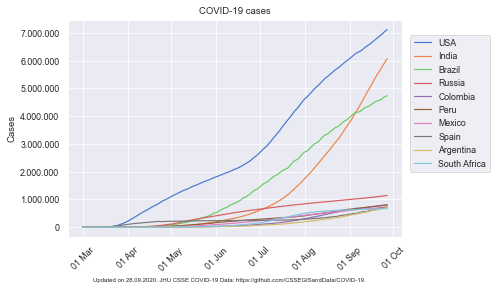

In [6]:
_ = graph.cases(cases[countries]['2020-03' : ])

We see that, besides USA, India, and Brazil, the rest of the countries are on a different scale and are thus hard to visualize. We can instead look at the cases per million inhabitants to get a better comparison.

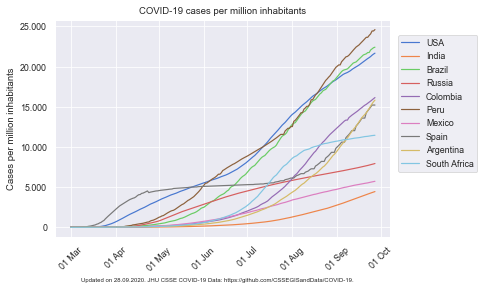

In [7]:
_ = graph.cases_per_million(cases[countries]['2020-03' : ], population_2019.reindex(countries))

This graph paints a very different picture. When taking their population into account, Peru becomes the worst performing country with Brazil and the US not far behind, while India moves to the bottom in this terms. Another transformation we can consider, this time to the x-axis, is to align the curves by days since the first case.

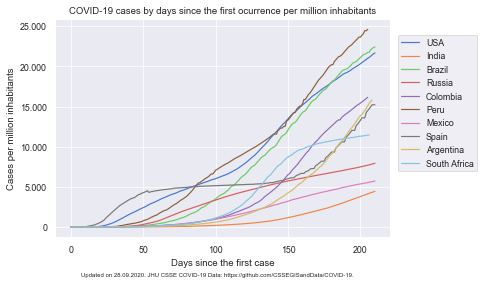

In [8]:
_ = graph.cases_by_days_per_million(cases[countries]['2020-03' : ], population_2019.reindex(countries))

All of these can also be applied to the deaths curves by changing to the corresponding graphing function and input DataFrames. For example, we see that Spain had a high mortality early on, while Peru has already reached a considerable worse scenario. In addition, the US, Brazil, and Mexico show a steady increase in their number of cases per capita, getting close to the situation of Spain.

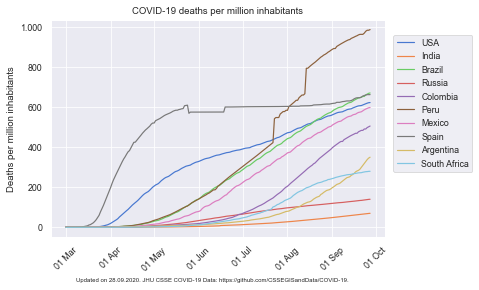

In [9]:
_ = graph.deaths_per_million(deaths[countries]['2020-03' : ], population_2019.reindex(countries))

The graphing module also includes similar functions for plotting the daily changes of cases and deaths. For example, let's look at the daily deaths curves. First, we can see some countries have smoother curves than other. This is likely due to problems with the tracking/reporting of the figures on a daily basis. We observe, for instance, two sharp peaks around the beginning of August for Peru due to accumulated deaths that were reported all at once. There is also a negative adjustment for Spain by the end of May, only to then be accounted for again in June. This is all probably due to the pandemic causing a serious stress on the countries' institutions.

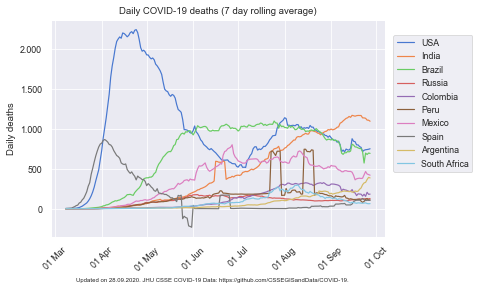

In [10]:
_ = graph.daily_deaths(deaths[countries]['2020-03' : ])

We can also notice trends in this plot much better than on the cumulative one. The US had the most severe peak in mid April, and a resurgence starting in July that has barely slowdown. Brazil had basically a peak around 1000 deaths that lasted 3 months while is not clear yet whether India is past the maximum of daily infections.

When looking at daily deaths per million inhabitants, the story is once again different. From these countries, Spain is by far the one that had the worse peak, while Russia and India have the best performance in this metric. We can also see that Argentina is experiencing a steep increase in deaths since mid September.

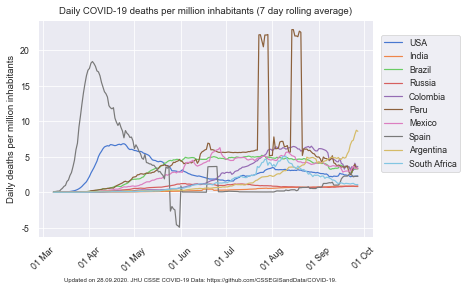

In [11]:
_ = graph.daily_deaths_per_million(deaths[countries]['2020-03' : ] , population_2019.reindex(countries))

Another possibility is to plot the evolution of the mortality rate. For this, we need to first compute a DataFrame with the daily mortality rates via the function `model.mortality`.

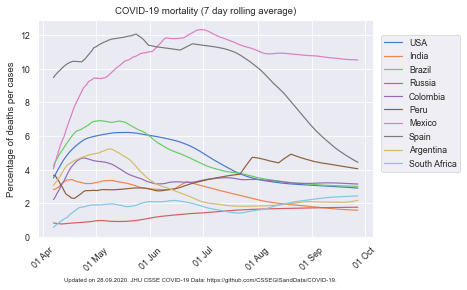

In [12]:
mortality = model.mortality(cases[countries]['2020-04' : ], deaths[countries]['2020-04' : ])
_ = graph.mortality(mortality)

Is interesting to note that, with the exception of Mexico, most of these countries are roughly approaching a mortality rate between 2% and 4%. Finally, we can generate a plot with all the countries curves for an overview of their situation so far during the pandemic. In order to have both the cases and deaths in the same plot, the y-axis is set to a logarithmic scale. Note that this plot is set for a maximum of 9 countries.

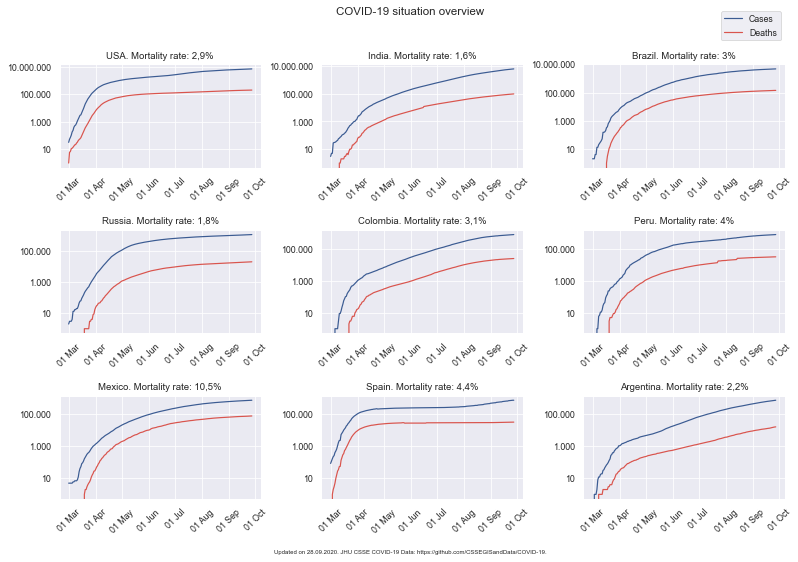

In [13]:
_ = graph.countries_situation_overview(cases[countries[ : 9]]['2020-03' : ], deaths[countries[ : 9]]['2020-03' : ])

## Modeling

The modeling module is build upon [Prophet](https://facebook.github.io/prophet/), a time series forecasting additive model with a trend component that can be nonlinear. This model does not take into consideration any other factors other than the past values of the cases and deaths for each country.

### Model assumptions:

- **The case and death curves during a pandemic wave grow logistically towards a saturation point.** The number of cases and deaths do not exactly follow a logistic growth function with fixed coefficients. For example, many countries' number of cases/deaths show a much faster exponential growth towards their peak than their approach to a saturation point. Moreover, some countries' daily growth curves have more than one local maximum. All of this is taken into account by the Prophet model through trend changepoints, where the coefficients are allowed to change. One must, however, provide a saturation value to the model, which is calculated by fitting a logistic curve to the tail of a given time series. One advantage of this method is that the saturation point gets updated every time the data is fitted, for example, when new data becomes available.

- **The cases and deaths curves are approximately piecewise linear in between pandemic waves.** After a country's pandemic wave ends, the curves tend to not fully flatten but rather present a growth that can be linearly approximated. The forecast of such a model during these stages should only be considered for short-term predictions. Once a country shows signs of entering another pandemic wave, one can switch to a logistical growth model, provided there is enough data to estimate a reasonable saturation point.

Let's start by modeling a case curve for the World.

In [14]:
country = 'World'

Looking at the case curve graph it is clear that we are far from reaching a saturation point. We can therefore assume that this curve is logistically growing towards a saturation point.

No handles with labels found to put in legend.


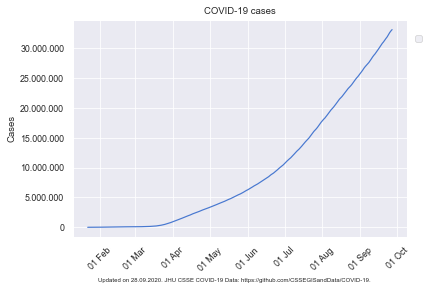

No handles with labels found to put in legend.


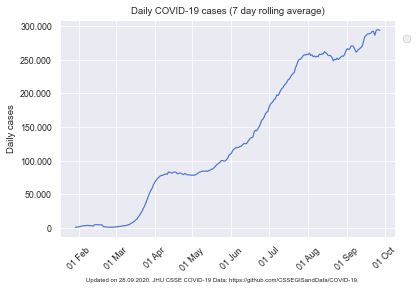

In [15]:
_ = graph.cases(cases[country])
_ = graph.daily_cases(cases[country])

To estimate a limit to the curve's growth, we utilize the `model.growth_limit` function. If we simply pass the entire time series to this function, we will most likely underestimate the limit, or simply get an incoherent result depending on the complexity of the curve. By looking at the daily case curve, we see that after an apparent peak at the beginning of April, there was a second period of steady growth starting in May which gives a good choice to slice the series. It is important to note that this calculation is very sensitive to the starting date chosen, and so some trail and error maybe required to find a reasonable value.

In [16]:
cap = model.growth_limit(cases[country]['2020-05':])
print(cap)

50115985



We then proceed to tune the hyperparameters for the Prophet model. We choose to tune the parameter `changepoint_prior_scale`, which determines the flexibility of the trend, and `seasonality_prior_scale`, which controls the flexibility of the weekly seasonality. Cross-validation is implemented in `model_hyperparameter_tunning` following the procedure explained [here](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning). Before we do this, we must transform the time series to a format Prophet understands using `processing.to_prophet_input`. Since we are using logistical growth, the value of the cap must also be provided. 

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:12<00:00,  4.11s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:10<00:00,  3.54s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:00,  3.21s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:00,  3.10s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:00,  3.11s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:00,  3.16s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:

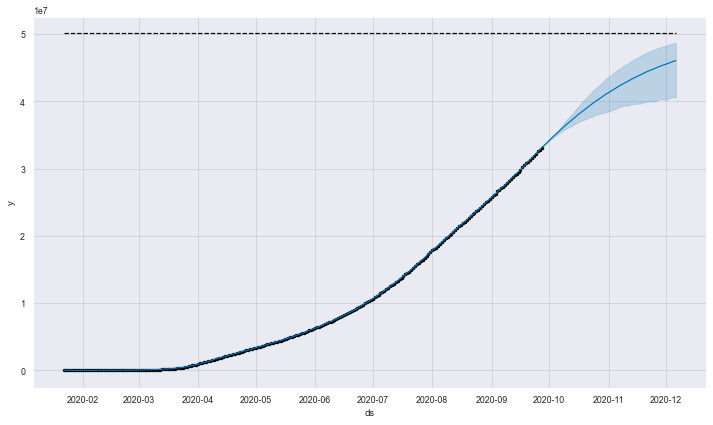

In [17]:
train = processing.to_prophet_input(cases[country], cap)
params = model.hyperparameter_tunning(train)

Besides printing a table with all posible parameter combinations and their performance, the function also plots the raw output of the Prophet model for visual inspection as the parameters resulting in the lowest root mean square error do not necessarily yield an adequate model. In this case, we take the suggested values. Before moving to the next step, we need to explicitly add the type of growth to the parameter dictionary.

In [18]:
params['growth'] = 'logistic'

We are ready to fit a model to the full time series. Besides the series, cap, and tuned hyperparameters, we can optionally pass a list of dates with outliers to be omitted from the training. We see that this results in a dictionary containing the trained Prophet model, the train set used, and the cap in case of logistic growth.

In [19]:
model_cases = model.init_fit(series=cases[country], cap=cap, hyperparams=params)
model_cases

{'m': <fbprophet.forecaster.Prophet at 0x7ff3aa0550a0>,
 'train': Date
 2020-01-22         555.0
 2020-01-23         654.0
 2020-01-24         941.0
 2020-01-25        1434.0
 2020-01-26        2118.0
                  ...    
 2020-09-23    31866343.0
 2020-09-24    32227277.0
 2020-09-25    32562075.0
 2020-09-26    32840012.0
 2020-09-27    33077724.0
 Name: World, Length: 250, dtype: float64,
 'cap': 50115985}

**A note on performance.** While Prophet models can be serialized as explained [here](https://facebook.github.io/prophet/docs/additional_topics.html#saving-models), the performance difference of refitting a whole time series versus updating the fit to new data in the series is in this case not significant. We have thus chosen not to implement the model in this way.

We can then repeat this process for the death curve.

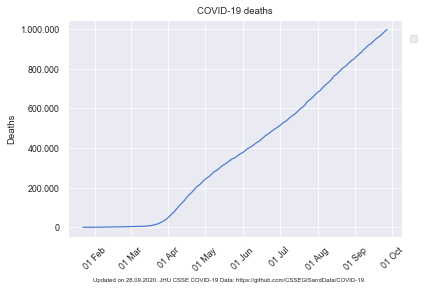

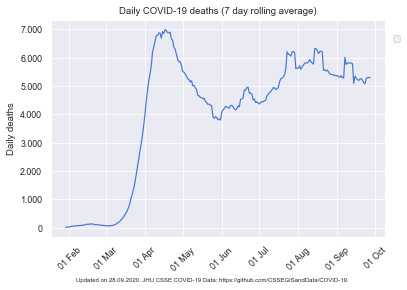

In [20]:
_ = graph.deaths(deaths[country])
_ = graph.daily_deaths(deaths[country])

In this case, the daily death curve shows that the peak already occur in mid April. After a period of decreasing daily deaths, one can observe a change in this trend starting in June. We thus choose this date as a starting point to determine the growth limit.

In [21]:
cap = model.growth_limit(deaths[country]['2020-06':])
print(cap)

1594500


In [22]:
train = processing.to_prophet_input(deaths[country], cap)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:08<00:00,  2.82s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:07<00:00,  2.54s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:07<00:00,  2.49s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:00,  3.04s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:00,  3.16s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:00,  3.14s/it]
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-30 00:00:00 and 2020-07-29 00:00:00
100%|██████████| 3/3 [00:09<00:

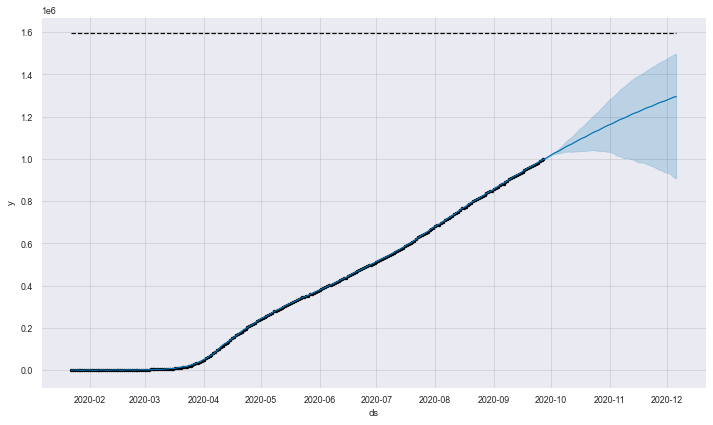

In [23]:
params = model.hyperparameter_tunning(train)

Here, it is worth noting in the raw Prophet model graph above that the 95% confidence interval includes the possibility of the total number of deaths to decrease in time. While this is of course not posible, the Prophet model does not take this factor into consideration. This is one of the aspects that are accounted in the modeling module to better match the behavior of the curves we are trying to model.

In [24]:
params['growth'] = 'logistic'

In [25]:
model_deaths = model.init_fit(series=deaths[country], cap=cap, hyperparams=params)
model_deaths

{'m': <fbprophet.forecaster.Prophet at 0x7ff3a99dc1c0>,
 'train': Date
 2020-01-22        17.0
 2020-01-23        18.0
 2020-01-24        26.0
 2020-01-25        42.0
 2020-01-26        56.0
                 ...   
 2020-09-23    976233.0
 2020-09-24    982949.0
 2020-09-25    988864.0
 2020-09-26    994143.0
 2020-09-27    997734.0
 Name: World, Length: 250, dtype: float64,
 'cap': 1594500}

Once a model for both the case and the death curve are ready, we can generate a report with a summary of the World's COVID-19 current situation. This includes information on cases and deaths the last date the data was updated, the models predictions for the next day, and some long term estimations of the current pandemic wave peak, duration, and the estimated total number of cases and death by the end of the wave.

In [26]:
_ = model.report(model_cases, model_deaths, country)

World:

	Data on 28.09.2020:

		Cases: 33.077.724 (+237.712).
		Deaths: 997.734 (+3.591).
		Mortality rate: 3%.

	Today's predictions:

		Cases: 33.346.570 (+268.846).
		Deaths: 1.002.105 (+4.371).

	Expected parameters:

		Maximum daily infections on 17.09.2020.
		Current pandemic's wave to end on 16.07.2021.
		Total number of cases: 50.115.985.
		Total number of deaths: 1.594.500.
		Final mortality rate: 3,2%.

	Cases model's metrics:

		Root Mean Squared Error: 22.676,16.
		Explained Variance: 1.

	Deaths model's metrics:

		Root Mean Squared Error: 1.076,01.
		Explained Variance: 1.



At the time of writing, we can expect the current COVID-19 pandemic wave to keep developing for almost a year, resulting in roughly 50 million cases and over 1 and a half million deaths worldwide. In other words, without a vaccine the pandemic is far from being over any time soon.

To produce DataFrames with forecasts, we can use `model.predict`. Besides a train model, the second input to this function is the number of periods to be forecasts, in this case, 10 weeks.

In [27]:
forecast_cases = model.predict(model_cases, 70)
forecast_deaths = model.predict(model_deaths, 70)

The resulting DataFrame contains a the 95% confidence interval `(yhat_lower, yhat_upper)`, the predicted value `yhat`, and the daily change `yhat_delta`.

In [28]:
forecast_cases

,yhat_lower,yhat_upper,yhat,yhat_delta
ds,,,,
2020-09-28,33314015.0,33377663.0,33346570.0,268846
2020-09-29,33586114.0,33657288.0,33623225.0,276655
2020-09-30,33863724.0,33955270.0,33908274.0,285049
2020-10-01,34137719.0,34261372.0,34197441.0,289167
2020-10-02,34398338.0,34577169.0,34484626.0,287185
...,...,...,...,...
2020-12-02,39850477.0,48376929.0,45661905.0,110101
2020-12-03,39850477.0,48441311.0,45776477.0,114572
2020-12-04,39850477.0,48546868.0,45889507.0,113030



Finally, `graph.country_situation_with_forecast` yields a visual summary of the current status of the worldwide COVID-19 pandemic, including the data from the 10 week predictions above. Together with the information from `model.report`, and at the time of writing, we see that while both the number of cases and deaths keep showing significant growths, the peak of this wave appears to have already happened. We can only hope that the curves continue to flatten, as a trend change in the opposite direction would result in a significant increase in the long-term predictions for the total number of victims of this decease by the end of this pandemic wave.

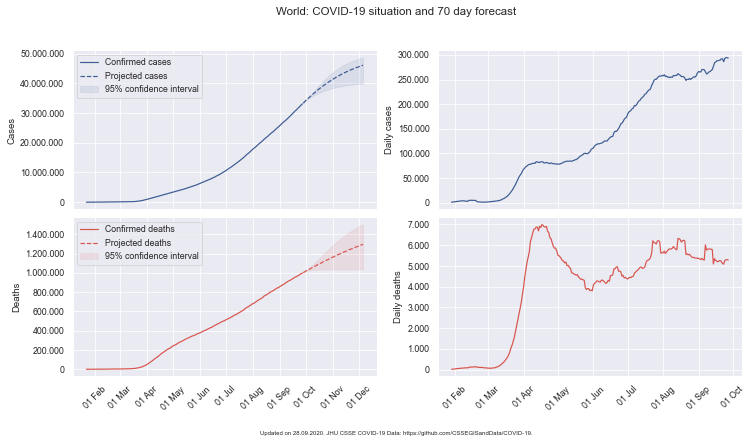

In [29]:
_ = graph.country_situation_with_forecast(model_cases['train'], model_deaths['train'], forecast_cases, forecast_deaths)